<a href="https://colab.research.google.com/github/yusrililhm/Iris_MLproject/blob/main/Iris_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Domain Knowledge**

**Problem**

**Goals / Target**

Menentukan model machine learning terbaik untuk klasifikasi data

**Solution**

**Data Collecting**

Dataset yang digunakan dalam studi kasus ini, bisa didapatkan di www.kaggle.com

**Exploratory Data Analyze**

Exploratory Data Analysis (EDA) atau dikenal pula dengan analisis data eksploratif merupakan pendekatan analisis untuk suatu data guna membuat gambaran keseluruhan (summary) data sehingga mudah untuk dipahami. Metode analisis ini menyediakan berbagai alat untuk meringkas dan memperoleh wawasan tentang sekumpulan data dengan cepat menggunakan graﬁk sebagai bentuk visualisasi data, tanpa menggunakan model statistik, atau formulasi hipotesis.

Langkah pertama dalam menganalisis data adalah mempelajari karakteristik data tersebut. Analisis data eksploratif sangat penting untuk menunjang statistisi dalam menelaah dan menemukan karakteristik data yang selanjutnya dapat berguna dalam pemilihan model statistika yang tepat. Dua alat penting dalam EDA untuk menunjukkan karakteristik data adalah ringkasan numerik dan diagram kotak (boxplot). Ringkasan numerik menunjukkan dimana data memusat dan bagaimana sebaran datanya. Sedangkan boxplot digunakan untuk mengetahui bagaimana distribusi data, dimana distribusi data ini sangat dibutuhkan untuk menentukan motode analisis statistika apa yang tepat untuk data tersebut. Dengan demikian, eksploratif dan visualisasi data sangatlah penting untuk dipelajari dalam statistika.

In [ ]:
#Basic Library
import pandas as pd

#data visualization lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Decission Tree
from sklearn.tree import DecisionTreeClassifier

#Random Forrest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#read dataset dan tampilkan 5 baris tearatas
iris = pd.read_csv('/content/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#menampilkan 5 baris terakhir
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris#mengetahui jumlah baris dan kolom
print(f'Jumlah baris : {iris.shape[0]} \njumlah kolom : {iris.shape[1]}')

Jumlah baris : 150 
jumlah kolom : 6


In [ ]:
#mengetaui apakah ada data bernilai null
iris.isna().values.any()

False

In [ ]:
#mengetahui tipe data
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

**Data Cleaning**

In [ ]:
#mengahpus kolom yang tidak diperlukan ('Id')
iris.drop(columns='Id', inplace=True)

In [ ]:
#overview dataset
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#data duplikat
iris.duplicated().value_counts()

False    147
True       3
dtype: int64

In [ ]:
#data duplikat

iris[iris.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
#hapus data duplikat
iris.drop_duplicates(inplace=True)

In [ ]:
#mengetahui jumlah baris dan kolom setelah menghapus data duplikat
print(f'Jumlah baris : {iris.shape[0]} \nJumlah Kolom : {iris.shape[1]}')

Jumlah baris : 147 
Jumlah Kolom : 5


In [ ]:
#identifikasi jumlah 'Species'
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

In [ ]:
#describe data
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


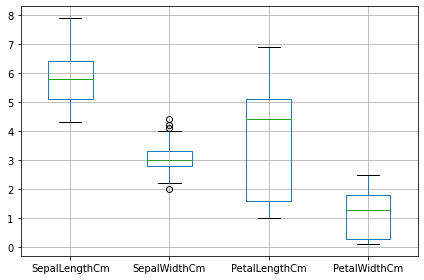

In [ ]:
#boxplot
iris.boxplot()
plt.tight_layout()

**Visualisasi Data**

In [ ]:
#matrix korelasi
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


Text(0.5, 1.0, 'Matrix Correlation')

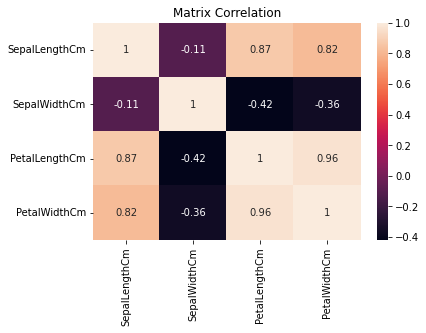

In [ ]:
#heatmap
sns.heatmap(data=iris.corr(), annot=True)
plt.title('Matrix Correlation')

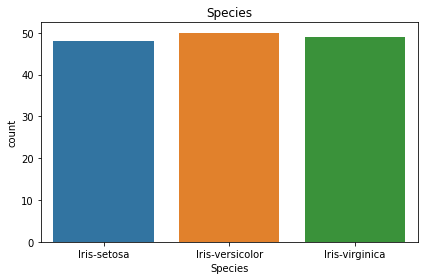

In [ ]:
#visualisasi data dengan bar plot menggunakan seaborn
sns.countplot(data=iris, x='Species')
plt.title('Species')
plt.tight_layout()

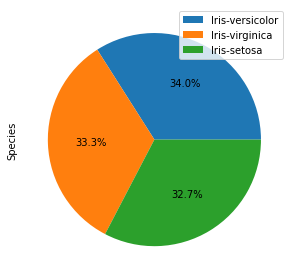

In [ ]:
#pie chart
iris['Species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'PetalWidth')

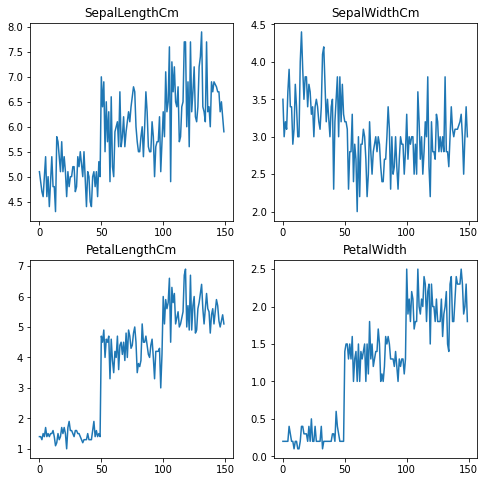

In [ ]:
#line plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

iris['SepalLengthCm'].plot.line(ax=ax[0][0])
ax[0][0].set_title('SepalLengthCm')

iris['SepalWidthCm'].plot.line(ax=ax[0][1])
ax[0][1].set_title('SepalWidthCm')

iris['PetalLengthCm'].plot.line(ax=ax[1][0])
ax[1][0].set_title('PetalLengthCm')

iris['PetalWidthCm'].plot.line(ax=ax[1][1])
ax[1][1].set_title('PetalWidth')

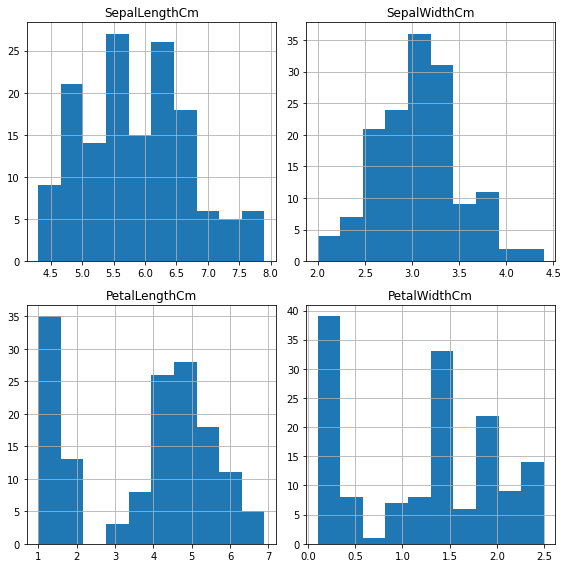

In [ ]:
#histogram
iris.hist(figsize=(8,8), bins=10)
plt.tight_layout()

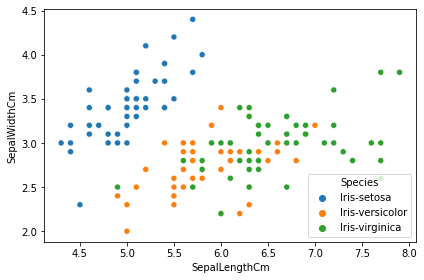

In [ ]:
#scatterplot
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species')
plt.tight_layout()

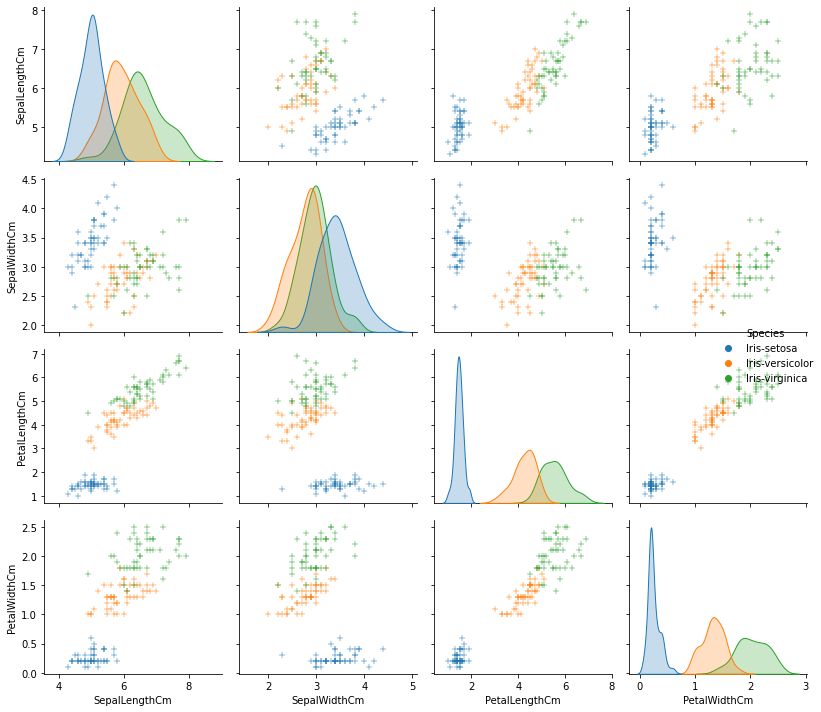

In [ ]:
#pairplot
sns.pairplot(iris, hue='Species', markers='+')
plt.tight_layout()

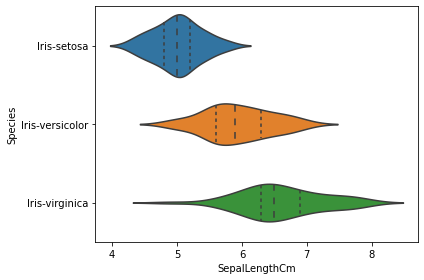

In [ ]:
#violin
sns.violinplot(data=iris, y='Species', x='SepalLengthCm', inner='quartile')
plt.tight_layout()

**Data Preprocessing**

In [ ]:
#data preprocessing

#menghapus 'Species' pada label X
X = iris.drop(columns=['Species'])
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#species ke labe y
y = iris['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
#membagi dataset ke dalam train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

#overview
print('-----Train-----')
print(f'X_train : {X_train.shape}\ny_train : {y_train.shape}')
print('-----Test-----')
print(f'X_test : {X_test.shape}\ny_test : {y_test.shape}')

-----Train-----
X_train : (88, 4)
y_train : (88,)
-----Test-----
X_test : (59, 4)
y_test : (59,)


**Modeling**